In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# Read images from folder

In [39]:
print(os.getcwd())
images = []
folders = [os.getcwd()+"/semi-conductor-image-classification-second-stage/train/train_contest/defect"\
           , os.getcwd()+"/semi-conductor-image-classification-second-stage/train/train_contest/good_all"]
for folder in folders:
    print(len(os.listdir(folder)))
    for filename in os.listdir(folder):
            img = cv2.imread(os.path.join(folder,filename),0)
            #img = cv2.resize(img, (128, 128),interpolation=cv2.INTER_NEAREST)
            if img is not None:
                images.append(img)
images = images[:14078]
print(len(images))
                
                
                
                
                
                

/Users/wilson/Documents/HKUST/MATH4995/Final_Project
7039
27420
14078


# Transform the image data to RGB histogram data

In [40]:
data = []
for image in images:
     data.append(cv2.calcHist([image],[0],None,[256],[0,256]))
        
print(data[0])


[[0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [3.000e+00]
 [1.600e+01]
 [5.200e+01]
 [1.320e+02]
 [1.320e+02]
 [1.480e+02]
 [1.470e+02]
 [1.270e+02]
 [1.030e+02]
 [1.050e+02]
 [6.200e+01]
 [8.800e+01]
 [1.190e+02]
 [2.090e+02]
 [3.570e+02]
 [6.560e+02]
 [9.880e+02]
 [1.225e+03]
 [1.425e+03]
 [1.521e+03]
 [1.521e+03]
 [1.493e+03]
 [1.578e+03]
 [1.783e+03]
 [2.008e+03]
 [2.376e+03]
 [2.682e+03]
 [2.975e+03]
 [3.107e+03]
 [3.279e+03]
 [3.156e+03]
 [2.962e+03]
 [2.910e+03]
 [2.663e+03]
 [2.509e+03]
 [2.129e+03]
 [1.823e+03]
 [1.497e+03]
 [1.219e+03]
 [9.790e+02]
 [8.030e+02]
 [6.630e+02]
 [6.300e+02]
 [5.170e+02]
 [4.790e+02]
 [4.860e+02]
 [4.350e+02]
 [3.940e+02]
 [4.080e+02]

# Visualize the histograms of defect and good ones

(0.0, 256.0)

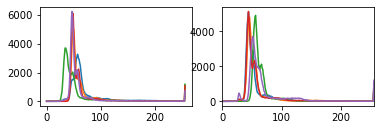

In [41]:
plt.subplot(221), plt.plot(data[0]), plt.plot(data[1]), plt.plot(data[2]), plt.plot(data[3]), plt.plot(data[4])
plt.subplot(222), plt.plot(data[7050]), plt.plot(data[7051]), plt.plot(data[7052]), plt.plot(data[7053]), plt.plot(data[7054])
plt.xlim([0,256])




# Split the train set and test set

In [42]:
d = {}
for i in range(data[0].shape[0]):
    d[str(i)] = [j[i] for j in data]
X = pd.DataFrame(data=d)
X = X.to_numpy()
print(X.shape)
Y = np.concatenate((np.ones((7039,1)), np.zeros((7039,1))))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20,random_state=1)





(14078, 256)


# Train the model

In [43]:
print(Y.shape)
svclassifier = SVC(kernel='rbf',probability=True)
svclassifier.fit(X_train, Y_train)
Y_pred = svclassifier.predict(X_test)






(14078, 1)


# Metrics

In [44]:
print("\tAccuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("\tPrecision:",metrics.precision_score(Y_test, Y_pred))
print("\tRecall:",metrics.recall_score(Y_test, Y_pred))

	Accuracy: 0.7027698863636364
	Precision: 0.7255851493139629
	Recall: 0.6439828080229226


# Confusion Matrix

Text(0.5, 257.44, 'Predicted label')

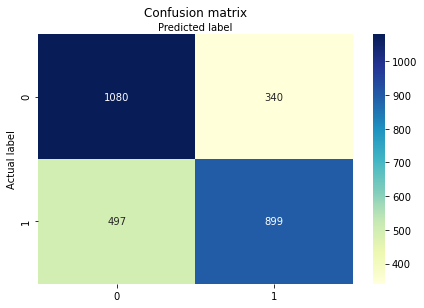

In [45]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
class_names=["0","1"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# ROC

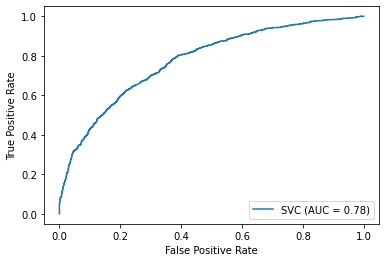

In [46]:
metrics.plot_roc_curve(svclassifier, X_test, Y_test)
plt.show() 

# Turn in the validate set

In [47]:
valid_images = []
folder = os.getcwd()+"/semi-conductor-image-classification-second-stage/test/test_contest/test"
for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename),0)
    #img = cv2.resize(img, (128, 128),interpolation=cv2.INTER_NEAREST)
    if img is not None:
        valid_images.append(img)
valid_data = []
for image in valid_images:
     valid_data.append(cv2.calcHist([image],[0],None,[256],[0,256]))
valid_d = {}
for i in range(valid_data[0].shape[0]):
    valid_d[str(i)] = [j[i] for j in valid_data]
valid_X = pd.DataFrame(data=valid_d)

In [48]:
result = np.asarray(svclassifier.predict_proba(valid_X))
Valid_Y = svclassifier.predict(valid_X)
print(result)

[[0.45439251 0.54560749]
 [0.34818755 0.65181245]
 [0.74499175 0.25500825]
 ...
 [0.72009301 0.27990699]
 [0.7792588  0.2207412 ]
 [0.39237301 0.60762699]]


In [52]:
r = {}
id = []
for i in os.listdir(folder):
    id.append(i[:-4])
r["id"] = id
r["defect_score"] = result[:,1]
r = pd.DataFrame(data=r)

In [51]:
print(result[:,1])
r.to_csv(r'result.csv', index = False)

[0.54560749 0.65181245 0.25500825 ... 0.27990699 0.2207412  0.60762699]
